<a href="https://colab.research.google.com/github/thanpip/-Analyzing-Historical-Data/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_%CF%84%CE%BF%CF%85_%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_%CF%84%CE%BF%CF%85_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # ανοίγει παράθυρο επιλογής αρχείου

# Υποθέτουμε ότι ανέβασες π.χ. "data.csv"
data = pd.read_csv("finance_liquor_sales.csv")

Saving finance_liquor_sales.csv to finance_liquor_sales (1).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#Convert data set to DataFrame.
df=pd.DataFrame(data)
#First View of all data.
print(f"First five records: \n {df.head()}")
print(f"Last five records: \n {df.tail()}")
print(f"Information about types, memory,non-null and column names: \n {df.info()}")
print(f"Sum of null values per column:\n {df.isnull().sum()}")
print(f"Sum of duplicated values:\n {df.duplicated().sum()}")
# Convert the date column to datetime, create a new variable for the year, and select only the years 2016–2019.
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df=df[(df["year"]>2015)&(df["year"]<2020)]
df = df.reset_index(drop=True)

First five records: 
   invoice_and_item_number        date  store_number  \
0         INV-31797900035  2020-11-10          4967   
1         INV-23548800092  2019-11-27          2601   
2         INV-23609300026  2019-12-02          4962   
3         INV-39482900037  2021-08-24          3719   
4         INV-39520400088  2021-08-25          5423   

                      store_name                   address          city  \
0     Jeff's Market / Blue Grass           102, W Mayne St    Blue Grass   
1  Hy-Vee Food Store / Fairfield  1300 West Burlington Ave     Fairfield   
2                Hilltop Grocery          1312 Harrison St     Davenport   
3   Wal-Mart 0581 / Marshalltown          2802 S Center St  Marshalltown   
4            Stammer Liquor Corp               615 2nd Ave       Sheldon   

   zip_code                store_location  county_number     county  ...  \
0   52726.0  POINT (-90.766126 41.509119)           82.0      SCOTT  ...   
1   52556.0  POINT (-91.978702 41.0064

In [5]:
#First View of selected data.
print(f"First five records: \n {df.head()}")
print(f"Last five records: \n {df.tail()}")
print(f"Information about types, memory,non-null and column names: \n {df.info()}")
print(f"Sum of null values per column:\n {df.isnull().sum()}")
print(f"Sum of duplicated values:\n {df.duplicated().sum()}")

First five records: 
   invoice_and_item_number       date  store_number  \
0         INV-23548800092 2019-11-27          2601   
1         INV-23609300026 2019-12-02          4962   
2            S30390600011 2016-01-26          2641   
3            S30348700047 2016-01-25          3162   
4            S30466200002 2016-02-01          2633   

                          store_name                   address  \
0      Hy-Vee Food Store / Fairfield  1300 West Burlington Ave   
1                    Hilltop Grocery          1312 Harrison St   
2  Hy-Vee Drugstore / Council Bluffs            757 W BROADWAY   
3        Nash Finch / Wholesale Food             807 GRANDVIEW   
4       Hy-Vee #3 / BDI / Des Moines           3221 SE 14TH ST   

             city  zip_code                        store_location  \
0       Fairfield   52556.0          POINT (-91.978702 41.006456)   
1       Davenport   52803.0                                   NaN   
2  COUNCIL BLUFFS   51501.0          POINT (-95.8

In [6]:
##Data Cleaning and Preparation
# We are going to delete the column "store_location" because it contains many missing values
# and provides unnecessary information.
df.drop("store_location",axis=1,inplace=True)
#We will convert the following variables to categorical type:pack
#There is no reason, for this report, to endoce them as ordinal variables.
#We also note that there are several variables that could be converted to categorical type.
#However, doing so would not necessarily improve memory usage.
df['pack']=df['pack'].astype('category')

##Filling Missing Values

county_null=df['county'].loc[df['county'].isnull()==True]#Missing Values in "county"
county_number_null=df['county_number'].loc[df['county_number'].isnull()==True]#Missing Values in "county_number"
fill_null_county=df['county'].loc[df['zip_code']==df['zip_code'].iloc[county_null.index[0]]]#Value in "county"
fill_null_county_number=df['county_number'].loc[df['zip_code']==df['zip_code'].iloc[county_number_null.index[0]]]#Value in "county_number"
df['county'].iloc[county_null.index[0]]=fill_null_county.iloc[0]#Filling Missing Values
df['county_number'].iloc[county_number_null.index[0]]=fill_null_county_number.iloc[0]#Filling Missing Values

#All records missing values in the category and category_name fields are filled with 0 and UNKNOWN to ensure dataset consistency.

category_null=df['category'].loc[df['category'].isnull()==True]#Missing Values in "category" and "category_name"
df['category'].iloc[list(set(category_null.index))]=0 #Filling Missing Values
df['category_name'].iloc[list(set(category_null.index))]="UNKNOWN"#Filling Missing Values

#The remaining missing-value records correspond to the same category, so we will group them into a new category named CATEGORY1.

category_name_null=df['category_name'].loc[df['category_name'].isnull()==True]#Missing Values in "category_name"
lo=list(set(category_name_null.index))
df['category_name'].iloc[lo]="CATEGORY1"#Filling Missing Values


##Convert float to integer.

df['zip_code']=df['zip_code'].astype('int')
df['county_number']=df['county_number'].astype('int')
df['category']=df['category'].astype('int')
df['vendor_number']=df['vendor_number'].astype('int')

##Downcasting integer
df['zip_code'] = pd.to_numeric(df['zip_code'], downcast='integer')
df['county_number']= pd.to_numeric(df['county_number'], downcast='integer')
df['category']= pd.to_numeric(df['category'], downcast='integer')
df['vendor_number'] = pd.to_numeric(df['vendor_number'], downcast='integer')
df['year'] = pd.to_numeric(df['year'], downcast='integer')

##Downcasting float

df['state_bottle_cost'] = pd.to_numeric(df['state_bottle_cost'], downcast='float')
df['state_bottle_retail'] = pd.to_numeric(df['state_bottle_retail'], downcast='float')
df['sale_dollars'] = pd.to_numeric(df['sale_dollars'], downcast='float')
df['volume_sold_liters'] = pd.to_numeric(df['volume_sold_liters'], downcast='float')
df['volume_sold_gallons'] = pd.to_numeric(df['volume_sold_gallons'], downcast='float')
#ΝΑ ΔΩ ΑΡΓΟΤΕΡΑ ΠΩΣ ΘΑ ΧΕΙΡΙΣΤΩ ΤΑ OUTLIERS
#Checking for outliers
#float_var=['state_bottle_cost','state_bottle_retail','sale_dollars','volume_sold_liters','volume_sold_gallons']
#for i in float_var:
#  Q1 = df[i].quantile(0.25)
#  Q3 = df[i].quantile(0.75)
#  IQR = Q3 - Q1
#  Outliers=df[(df[i] < Q1 - 1.5*IQR)|(df[i] > Q3 + 1.5*IQR)]
#  print(f"Outliers for the variable {i}:{Outliers[i]}")


/tmp/ipython-input-1657842772.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['county'].iloc[county_null.index[0]]=fill_null_county.iloc[0]#Filling Missing Values
/tmp/ipython-input-1657842772.py:17: SettingWithCopyWarning: 
A value 

In [7]:
##Part2##
# Group by zip_code and item_number and compute the total volume sold for each pair.
sold_liters_per_item_and_zip=df.groupby(['zip_code','item_number'])['volume_sold_liters'].sum()
# Convert the Series from groupby sum into a DataFrame for further manipulation.
sold_liters_per_item_and_zip=pd.DataFrame(sold_liters_per_item_and_zip)
#Select the index with maximum 'volume_sold_liters' and reset index for further munipulation.
idx=sold_liters_per_item_and_zip.groupby('zip_code')['volume_sold_liters'].idxmax()
sold_liters_per_item_and_zip=sold_liters_per_item_and_zip.loc[idx]
sold_liters_per_item_and_zip=sold_liters_per_item_and_zip.reset_index()
# Convert the Series from groupby sum into a DataFrame for further manipulation.
sold_liters_per_item_and_zip=pd.DataFrame(sold_liters_per_item_and_zip)
# We are going to create a new DataFrame which will consist of item_number and item_description.
# The new DataFrame will be named 'items_number_description' and is based on the initial DataFrame (df).
# Because there are several item descriptions for each item_number, we will keep only the first.
items_number_description=df[['item_number','item_description']].drop_duplicates(subset=['item_number'],keep='first')
# We are going to left-merge these DataFrames on 'item_number' and rename the column names.
solution1=pd.merge(sold_liters_per_item_and_zip,items_number_description,on='item_number',how="left")
solution1=solution1.rename(columns={'zip_code':'Zip-Code','item_number':'Best Seller Item',
                                    'volume_sold_liters':"Sold Liters",'item_description':'Item Description'})
#Reorder the columns and print the DataFrame.
print(f"Identification of the best-selling item in each zip code:\n,{solution1[['Zip-Code','Best Seller Item','Item Description',"Sold Liters"]]}")

Identification of the best-selling item in each zip code:
,    Zip-Code  Best Seller Item                               Item Description  \
0      50010            946574                       Member's Mark Spiced Rum   
1      50022             86507                           Paramount Triple Sec   
2      50111             77805                     Saints N Sinners Apple Pie   
3      50131             38089                              Platinum 7x Vodka   
4      50158             67557                          Kamora Coffee Liqueur   
5      50263              3135                  Jagermeister w/2 Shot Glasses   
6      50265             67526                                  Kahlua Coffee   
7      50266               250  Avion Silver w/Powell & Mahoney Margarita Mix   
8      50314             86251                              Juarez Triple Sec   
9      50316             48099                                    Hennessy VS   
10     50317             56193          Paul Masso

In [8]:
#Part3
#Initially, calculate the total sales.
total_sales=df['sale_dollars'].sum()
#Furthermore, group the data by store and calculate the total sales for each store.
stores_sales=df.groupby('store_number')['sale_dollars'].sum()
stores_sales=stores_sales.reset_index()
#Finally, create a new column for the sales ratio and rename the column names.
stores_sales["Sales Ratio"]=stores_sales["sale_dollars"]/total_sales
stores_sales=stores_sales.rename(columns={'store_number':'Store Number','sale_dollars':'Sale Dollars'})
print(f"Store Sales Share: \n {stores_sales.round(4)}")

Store Sales Share: 
     Store Number  Sale Dollars  Sales Ratio
0           2178      9.740000       0.0002
1           2190   1078.920044       0.0169
2           2465     41.549999       0.0007
3           2512    706.320007       0.0111
4           2515    900.239990       0.0141
..           ...           ...          ...
59          5244     75.120003       0.0012
60          5259     27.000000       0.0004
61          5416    112.470001       0.0018
62          5446     21.000000       0.0003
63          9001   3712.500000       0.0582

[64 rows x 3 columns]


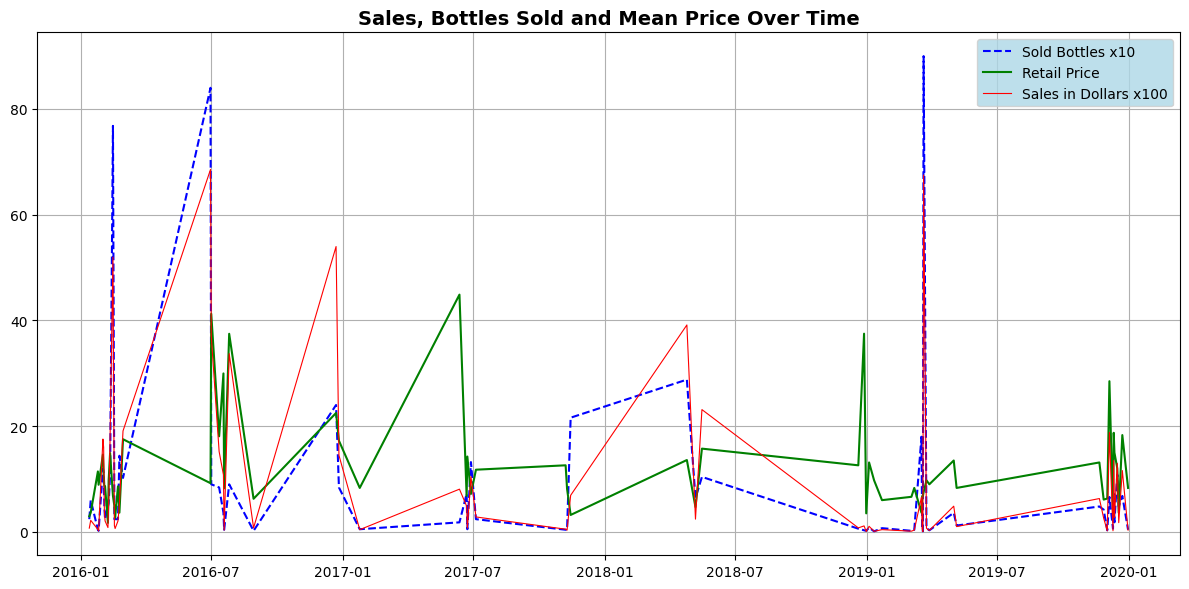

In [9]:
# Creation of a diagram which consists of three lines:
# The first line represents the sold bottles in tens over time.
# The second line represents the sales in dollars in hundreds over time.
# The third line represents the mean retail price per day over time.
import matplotlib.pyplot as plt
# Create DataFrames and reformat data for better representation
a=df.groupby("date")["bottles_sold"].sum()
a=a.reset_index()
a["bottles_sold"]=a["bottles_sold"]/10
b=df.groupby("date")["sale_dollars"].sum()
b=b.reset_index()
b["sale_dollars"]=b["sale_dollars"]/100
c=df.groupby("date")["state_bottle_retail"].mean()
c=c.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(a.date,a.bottles_sold,color="blue",linestyle="--",label="Sold Bottles x10")
plt.plot(c.date,c.state_bottle_retail,color="green",label="Retail Price")
plt.plot(b.date,b.sale_dollars,color="red",linewidth=0.8,label="Sales in Dollars x100")
plt.title("Sales, Bottles Sold and Mean Price Over Time",fontsize=14, fontweight="bold")
plt.tight_layout()
plt.grid()
plt.legend(facecolor="#ADD8E6")
plt.show()
#The following diagram shows the retail price, the number of bottles sold, and the total sales.
#According to the diagram, when the price is low, both sales and the number of bottles sold increase.

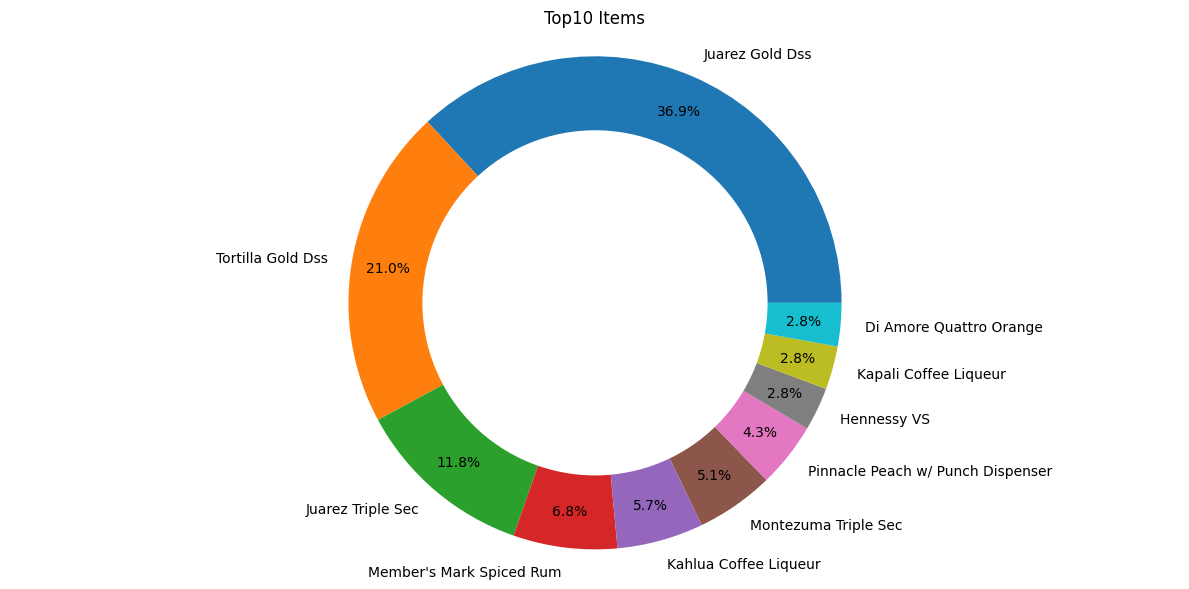

The following list presents the top 10 items: 
    item_number  bottles_sold                   item_description
0        75087          1560                    Juarez Gold Dss
1        77487           888                  Tortilla Gold Dss
2        86251           498                  Juarez Triple Sec
3       946574           288           Member's Mark Spiced Rum
4        67527           240              Kahlua Coffee Liqueur
5        86390           216               Montezuma Triple Sec
6          168           180  Pinnacle Peach w/ Punch Dispenser
7        48099           120                        Hennessy VS
8        67586           120              Kapali Coffee Liqueur
9       973627           120            Di Amore Quattro Orange


In [10]:
#We are going to create a pie chart that shows the distribution of the top 10 items.
import matplotlib.pyplot as plt
#Create the appropriate DataFrame
sales_per_item=df.groupby("item_number")["bottles_sold"].sum()
sales_per_item=pd.DataFrame(sales_per_item)
sales_per_item=sales_per_item.reset_index()
sales_per_item=sales_per_item.sort_values(by="bottles_sold",ascending=False)
sales_per_item=pd.merge(sales_per_item,items_number_description,on="item_number",how="left")
top10_items=sales_per_item.head(10)
fig, ax = plt.subplots(figsize=(12, 6))
wedges, texts, autotexts = ax.pie(top10_items["bottles_sold"], labels=top10_items["item_description"], autopct='%1.1f%%',startangle=360, pctdistance=0.85, labeldistance=1.1)
#Create the circle at the center to give the chart a donut-like appearance.
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Top10 Items')
plt.tight_layout()
plt.show()
print(f"The following list presents the top 10 items: \n {top10_items}")

In [11]:
#Calculate total sales in dollars
total_sales=df["sale_dollars"].sum()
#Create a new column containing the profit for each order.
df["profit"]=((df["state_bottle_retail"]-df["state_bottle_cost"])*df["bottles_sold"]).round(3)
#Create a new dataframe which will contain profit in dollars, total sales in dollars and ratio of total sales in dollars per item number.
#Calcucate the total sale in dollars per item.
total_sales_per_item=pd.DataFrame(df.groupby("item_number")["sale_dollars"].sum()).reset_index()
#Calcucate the total profit in dollars per item.
profit_per_item=pd.DataFrame(df.groupby("item_number")["profit"].sum()).reset_index()
sales_per_item=pd.merge(sales_per_item,total_sales_per_item,on="item_number",how="left")
sales_per_item=pd.merge(sales_per_item,profit_per_item,on="item_number",how="left")
sales_per_item["ratio_of_total_sales(%)"]=round((sales_per_item["sale_dollars"]/total_sales)*100,3)
top10_items=sales_per_item.sort_values(by="sale_dollars",ascending=False).head(10)
#top10_items["sale_dollars"]=top10_items["sale_dollars"].map(lambda x: f"{x:.2f}")

In [12]:
#Print the DataFrame.
print(f"Top 10 best seller items: \n {top10_items}")

Top 10 best seller items: 
     item_number  bottles_sold                               item_description  \
0         75087          1560                                Juarez Gold Dss   
1         77487           888                              Tortilla Gold Dss   
4         67527           240                          Kahlua Coffee Liqueur   
3        946574           288                       Member's Mark Spiced Rum   
13        27357            90   Cedar Ridge Single Malt Single Barrel Select   
14          250            90  Avion Silver w/Powell & Mahoney Margarita Mix   
12        43040           102                           Bacardi Gold Rum PET   
6           168           180              Pinnacle Peach w/ Punch Dispenser   
18       926577            66               Glen Oaks Whiskey Buy the Barrel   
2         86251           498                              Juarez Triple Sec   

    sale_dollars   profit  ratio_of_total_sales(%)  
0   11620.799805  3873.60             

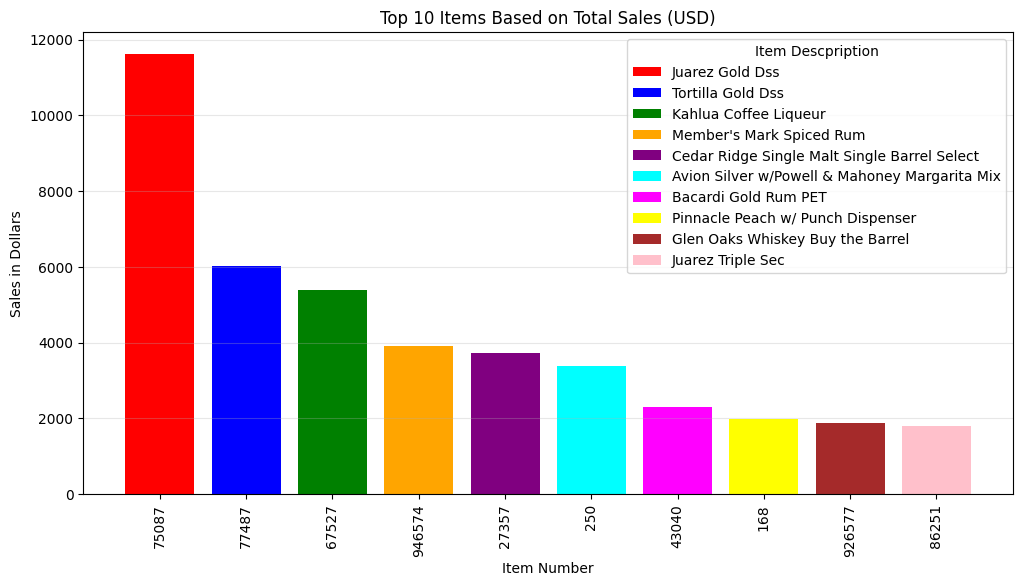

In [13]:
#Create a new barplot which will represent "Top 10 Items Based on Total Sales (USD)".
plt.figure(figsize=(12, 6))
colors = ["red","blue","green","orange","purple","cyan","magenta","yellow","brown","pink"]
plt.bar(
    top10_items["item_number"].astype(str),
    top10_items["sale_dollars"],
    color=colors,
    label=top10_items["item_description"])
plt.xlabel("Item Number")
plt.ylabel("Sales in Dollars")
plt.title("Top 10 Items Based on Total Sales (USD)")
plt.xticks(rotation=90)
plt.legend(title="Item Descpription")
plt.grid(axis="y", alpha=0.3)
plt.show()

## **EXPLORING THE FIRST TASK!!!**
1) Ποιο προιον εμφανιζεται περισσότερες φορές
2) ποιο είναι τα ε΄σοδα από αυτό το προιον και ποιος ο λόγος σε σχέση με τις συνολικές πωλήσεις και πωλήσεις μπουκαλιών.
3) Βάλε σε μια φθινουσα σειρά
4)Ανέλυσε τις πωλήσεις σε χρονικό πλάιδιο για το best seller καθε zipcode (δηλαδή μονο για εκείνη την περιοχή),και βάλε στο γράφημα μια γραμμή με την συνολική εικόνα για το συγκεκριμένο προιον εκείνη την χρονική περίοδο.

In [14]:
#Create a renamed copy of the DataFrame and save it
df_solution1=pd.merge(sold_liters_per_item_and_zip,items_number_description,on='item_number',how="left")
df_solution1["item_description"].astype("category")
favorite_item_per_sip_code=pd.DataFrame(df_solution1["item_description"].value_counts())
favorite_item_per_sip_code=favorite_item_per_sip_code.reset_index()
favorite_item_per_sip_code=favorite_item_per_sip_code.rename(columns={"item_description":"Item Description", "count":"Count"})
print(df_solution1)


    zip_code  item_number  volume_sold_liters  \
0      50010       946574              504.00   
1      50022        86507                4.00   
2      50111        77805               81.00   
3      50131        38089                4.80   
4      50158        67557                6.00   
5      50263         3135               63.00   
6      50265        67526               54.00   
7      50266          250               67.50   
8      50314        86251              240.00   
9      50316        48099                9.60   
10     50317        56193                4.80   
11     50320       973627              120.00   
12     50327        43040              178.50   
13     50401        86843               13.50   
14     50461        35918               52.50   
15     50501        38176               81.00   
16     50588        84617                4.00   
17     50662        86739                2.40   
18     50701        43034                2.62   
19     50702        

In [15]:
a=pd.DataFrame(df_solution1.groupby(["zip_code","item_number"])["sale_dollars"].sum())
a=pd.DataFrame(a)
a=a.reset_index()
a2=pd.DataFrame(df.groupby(["zip_code"])["sale_dollars"].sum())
a2=pd.DataFrame(a2)
a2=a2.reset_index()
b=pd.DataFrame(df_solution1.groupby(["zip_code","item_number"])["bottles_sold"].sum())
b=pd.DataFrame(b)
b=b.reset_index()
b2=pd.DataFrame(df.groupby(["zip_code"])["bottles_sold"].sum())
b2=pd.DataFrame(b2)
b2=b2.reset_index()
#df_solution1=pd.merge(df_solution1,a,on="zip_code",how="left")
#df_solution1=pd.merge(df_solution1,a2,on="zip_code",how="left",suffixes=("_of_item","_for_zip"))
#df_solution1=pd.merge(df_solution1,b,on="zip_code",how="left")
#df_solution1=pd.merge(df_solution1,b2,on="zip_code",how="left",suffixes=("_of_item","_for_zip"))
#df_solution1["ratio_of_item_sales(%)"]=(df_solution1["sale_dollars_of_item"]/df_solution1["sale_dollars_for_zip"]*100).map(lambda x: f"{x:.2f}")
#df_solution1["ratio_of_bottles_sold(%)"]=(df_solution1["bottles_sold_of_item"]/df_solution1["bottles_sold_for_zip"]*100).round(2)

KeyError: 'Column not found: sale_dollars'

In [ ]:
df_solution1=pd.merge(df_solution1,a,on="zip_code",how="left")
df_solution1=pd.merge(df_solution1,a2,on="zip_code",how="left",suffixes=("_of_item","_for_zip"))

print(a2)
print(df_solution1)

In [ ]:
a11=pd.DataFrame(df.groupby(['zip_code','item_number'])['volume_sold_liters'].sum())
a22=pd.DataFrame(df.groupby(['zip_code','item_number'])['sale_dollars'].sum())
a33=pd.DataFrame(df.groupby(['zip_code','item_number'])['bottles_sold'].sum())
a11=a11.reset_index()
a22=a22.reset_index()
a33=a33.reset_index()
merged=pd.merge(a11,a22,on=['zip_code','item_number'],how="left")
merged=pd.merge(merged,a33,on=['zip_code','item_number'],how="left")
sold_liters_per_item_and_zip22222=pd.DataFrame(merged)
idx22222=sold_liters_per_item_and_zip22222.groupby('zip_code')['volume_sold_liters'].idxmax()
sold_liters_per_item_and_zip22222=sold_liters_per_item_and_zip22222.loc[idx22222]
sold_liters_per_item_and_zip22222=sold_liters_per_item_and_zip22222.reset_index()
sold_liters_per_item_and_zip22222=pd.DataFrame(sold_liters_per_item_and_zip22222)
#items_number_description=df[['item_number','item_description']].drop_duplicates(subset=['item_number'],keep='first')


In [ ]:
print(sold_liters_per_item_and_zip22222)